# Profitable App Profiles for App Store and Google Play Markets

This project is designed to clean and analyze data to help developers of Android and iOS mobile apps to understand which types of applications have the potential to be more profitable on Google Play and App Store markets.

## Opening and Exploring Datasets

As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.

Collecting data for over four million apps requires a significant amount of time and money, so we'll try to analyze a sample of the data instead. To avoid spending resources with collecting new data ourselves, we should first try to see whether we can find any relevant existing data at no cost. Luckily, these are two datasets that seem suitable for our purpose:

1. A data set containing data about approximately ten thousand Android apps from Google Play. You can download the data set directly from this [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps).

2. A data set containing data about approximately seven thousand iOS apps from the App Store. You can download the data set directly from this [link](https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps).

Let's import our datasets.

In [1]:
# importing csv module to read csv files
import csv

# The iOS dataset
ios_file = open('AppleStore.csv')
ios_read = csv.reader(ios_file)
ios_rows = list(ios_read)
ios_header = ios_rows[0]
ios = ios_rows[1:]

# The Android dataset
android_file = open('googleplaystore.csv')
android_read = csv.reader(android_file)
android_rows = list(android_read)
android_header = android_rows[0]
android = android_rows[1:]

We will write a function that will help us to explore the datasets. This will save us time as we need to explore the datasets frequently during the analysis.

In [2]:
# exploring a dataset given the start and end indices
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

Let's explore our datasets to understand their contents. We will do so by printing the first few rows of each dataset. We will also identify the columns that will help us with our analysis.

Let us start with iOS dataset.

In [3]:
print(ios_header, '\n')

explore_data(ios, 1, 3, True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'] 

['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 7197
Number of columns: 16


So, the App store has 7197 apps and 16 columns. The columns that will help us in our analysis are: `'track_name'`, `'currency'`, `'price'`, `'rating_count_tot'`, `'prime_genre'`. Some of the column names are not self explanatory but the details of each column can be found in this [documentation](https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps).

Now let's take a look at the Google Play dataset.

In [4]:
print(android_header, '\n')

explore_data(android, 1, 3, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


The Google Play has 10841 apps with some interesting columns that will help us to analyze the data like: `'App'`, `'Category'`, `'Rating'`, `'Reviews'`, `'Type'`, `'Genres'`, etc. 

## Deleting Wrong Data

The Google Play dataset has a dedicated [discussion section](https://www.kaggle.com/datasets/lava18/google-play-store-apps/discussion), and we can see that [one of the discussions](https://www.kaggle.com/datasets/lava18/google-play-store-apps/discussion/66015) describes an error for a certain row.

Let us find out the row index with the missing data and print it out to see the missing data.

In [5]:
print(android_header, '\n')
print('The length of the header:', len(android_header),'\n')

for row in android:
    if len(row) != len(android_header):
        print('The length of row with missing information:', len(row), '\n')
        print('The index of row with missing information:', android.index(row), '\n')
        print('The row with missing iformation is: \n', row)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

The length of the header: 13 

The length of row with missing information: 12 

The index of row with missing information: 10472 

The row with missing iformation is: 
 ['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


As seen, the row is missing the `'category column'` of the data. So, we are going to delete it to clean our data.

In [6]:
print('Length of data before deleting row:', len(android))
del android[10472]  # don't run this more than once
print('Length of data after deleting row:', len(android))

Length of data before deleting row: 10841
Length of data after deleting row: 10840


## Removing Duplicate Entries

### Part One
If we explore the Google Play data set long enough or look at the [discussions section](https://www.kaggle.com/datasets/lava18/google-play-store-apps/discussion), we'll notice some apps have duplicate entries. For instance, Instagram has four entries:

In [7]:
for app in android:
    name = app[0]
    if name == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


Now that we know the Google Play dataset has duplicate entries, let's count the number of duplicates in the dataset. 

In [8]:
duplicate_apps = []
unique_apps = []

for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)

print('The number of duplicate apps in the dataset:', len(duplicate_apps), '\n')
print('Examples of duplicate apps:', duplicate_apps[:6])

The number of duplicate apps in the dataset: 1181 

Examples of duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box']


Looking at the Instagram duplicates above, we can see that the number of reviews are different. It is most likely that the row with highest number of reviews is the latest row.So, we are going to keep this row in all our duplicated apps.

After we remove the 1181 duplicates, we should be left with 9659 apps based on the following formular:

In [9]:
print('Expected length:', len(android) - 1181 )

Expected length: 9659


### Part Two

Let us assign the row with highest user rating to each application so that we have unique apps with highest number of rating. We will check the length of our dataset again.

In [10]:
reviews_max = {}
for app in android:
    name = app[0]
    n_reviews = float(app[3])
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
    if name not in reviews_max:
        reviews_max[name] = n_reviews
        
print('Length of android dataset with unique apps:', len(reviews_max))

Length of android dataset with unique apps: 9659


We have it! It is 9659. So we are doing good.

Now, we will use the above dictionary to remove the duplicate rows.

In [11]:
android_clean = [] #This will store our new cleaned dataset
already_added = [] # This will store app names

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    if n_reviews == reviews_max[name] and name not in already_added:
        android_clean.append(app)
        already_added.append(name)

Now, let's explore the new dataset to make sure it has 9659 entries.

In [12]:
explore_data(android_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


We have remove the duplicates in our Google Play dataset. 

## Removing Non-English Apps

### Part One

By exploring both datasets, we will see that there are apps that are not designed for English speaking audience.

In [13]:
print(ios[813][1])
print(ios[6731][1])
print('\n')
print(android_clean[4412][0])
print(android_clean[7940][0])

爱奇艺PPS -《欢乐颂2》电视剧热播
【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜


中国語 AQリスニング
لعبة تقدر تربح DZ


We are not interested in keeping this types of applications, so we are going to remove them. 

To remove non-english apps, we should use a function that will detect non-english letters based on ASCII standard. 

Our function will classify all characters with ASCII number of less than 127 as english and others as non-english.

In [14]:
def eng_only(a_string):
    for character in a_string:
        if ord(character) > 127:
            return False
    return True

# testing the function
print(eng_only('Instagram'))
print(eng_only('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(eng_only('Instachat 😜'))

True
False
False


As seen above, our function `'eng_only'` classified `'Instachat 😜'` as non-english because it contain emoji. Emojis have ASCII number that are more than 127. Let's see it below:

In [15]:
print(ord('😜'))

128540


### Part Two

In order to reduce data loss, we are going to modify our function to classify all apps that have 3 characters that are bigger than 127 as non-english. In this way, we will be able to capture names with 3 emojis.

In [16]:
def eng_only(a_string):
    non_ascii = 0
    for character in a_string:
        if ord(character) > 127:
            non_ascii += 1
    if non_ascii > 3:
        return False
    else:
        return True

In [17]:
# testing the eng_only function
print(eng_only('Docs To Go™ Free Office Suite'))
print(eng_only('Instachat 😜'))
print(eng_only('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
True
False


- Our function seems to filter out the non-english names from the english names. It is still not perfect because english names with more than 3 emojis will be filter out. But, it is okay for our analysis because those names are rare fo occur.

So now lets use our new function to remove all non-english apps from our datasets. 

In [18]:
# Removing non-english apps from Google Play Store
android_english = []
for app in android_clean:
    name = app[0]
    if eng_only(name):
        android_english.append(app)

#Removing non-english apps from App Store
ios_english = []
for app in ios:
    name = app[1]
    if eng_only(name):
        ios_english.append(app)
        
print(explore_data(android_english, 0, 2, True))
print('\n')
print(explore_data(ios_english, 0, 2, True))        

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 9614
Number of columns: 13
None


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


Number of rows: 6183
Number of columns: 16
None


We are left with 9614 apps in Google Play Store and 6183 apps in App Store.

## Isolating the Free Apps

Since we are solely focused on apps that are free, we are going to isolate them in a separate list so that our analysis will begin.

In [19]:
# Getting free android apps
android_free = []
for app in android_english:
    price = app[7]
    if price == '0':
        android_free.append(app)
        
# Getting free iOS apps
ios_free = []
for app in ios_english:
    price = app[4]
    if price == '0.0':
        ios_free.append(app)
        
print('Number of free android apps:', len(android_free))
print('Number of free iOS apps:', len(ios_free))

Number of free android apps: 8864
Number of free iOS apps: 3222


So now we realized that we have 8864 free apps in Google Play Store and 3222 in App Store. 

## Most Common Apps by Genre

### Part One

To minimize risks and overhead, our validation strategy for an app idea will have three steps:

1. Build a minimal Android version of the app, and add it to Google Play.
2. If the app has a good response from users, we develop it further.
3. If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

Remember that our goal is to add app to both Google Play and App Store, we need to find profiles that are successful in both markets. For instance, a profile that works well for both markets might be a productivity app that makes use of gamification.

Let's begin the analysis by determining the most common genres for each market. For this, we'll build a frequency table for the `'prime_genre'` column of the App Store dataset, and the `'Genres'` and `'Category'` columns of the Google Play dataset.

### Part Two

We'll build two functions we can use to analyze the frequency tables:

1. One function to generate frequency tables that show percentages
2. Another function we can use to display the percentages in a descending order

In [20]:
# function to generate frequency tables
def freq_table(dataset, index):
    freq_dict = {}
    total = 0
    
    for row in dataset:
        total += 1
        column = row[index]
        if column in freq_dict:
            freq_dict[column] += 1
        else:
            freq_dict[column] = 1
            
    freq_percentages = {}
    for key in freq_dict:
        percentage = (freq_dict[key] / total) * 100
        freq_percentages[key] = percentage
    
    return freq_percentages
  
# function to display percentages in descending order  
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key) # value then key for easy sorting
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True) # reverse for descending order
    for entry in table_sorted:
        print(entry[1], ':', entry[0]) # printing name followed by sorted value

### Part Three

We start by examining the frequency table for the `'prime_genre'` column of the App Store dataset.

In [21]:
display_table(ios_free, -5) # Prime_Genre

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


We can see that among the free English apps, more than a half (58.16%) are games. Entertainment apps are close to 8%, followed by photo and video apps, which are close to 5%. Only 3.66% of the apps are designed for education, followed by social networking apps which amount for 3.29% of the apps in our data set.

The general impression is that App Store (at least the part containing free English apps) is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.), while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are more rare. However, the fact that fun apps are the most popolous doesn't also imply that they also have the greatest number of users — the demand might not be the same as the offer.

Let's continue by examining the `'Category'` and `'Genres'` columns of the Google Play dataset (two columns which seem to be related).

In [22]:
display_table(android_free, 1) # Category

FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021661
PARENTING : 0.6543321299638989
ART_AND_DESIGN : 

The landscape seems significantly different on Google Play: there are not that many apps designed for fun, and it seems that a good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.). 

However, if we investigate this further, we can see that the family category (which accounts for almost 19% of the apps) means mostly games for kids. See picture attached.


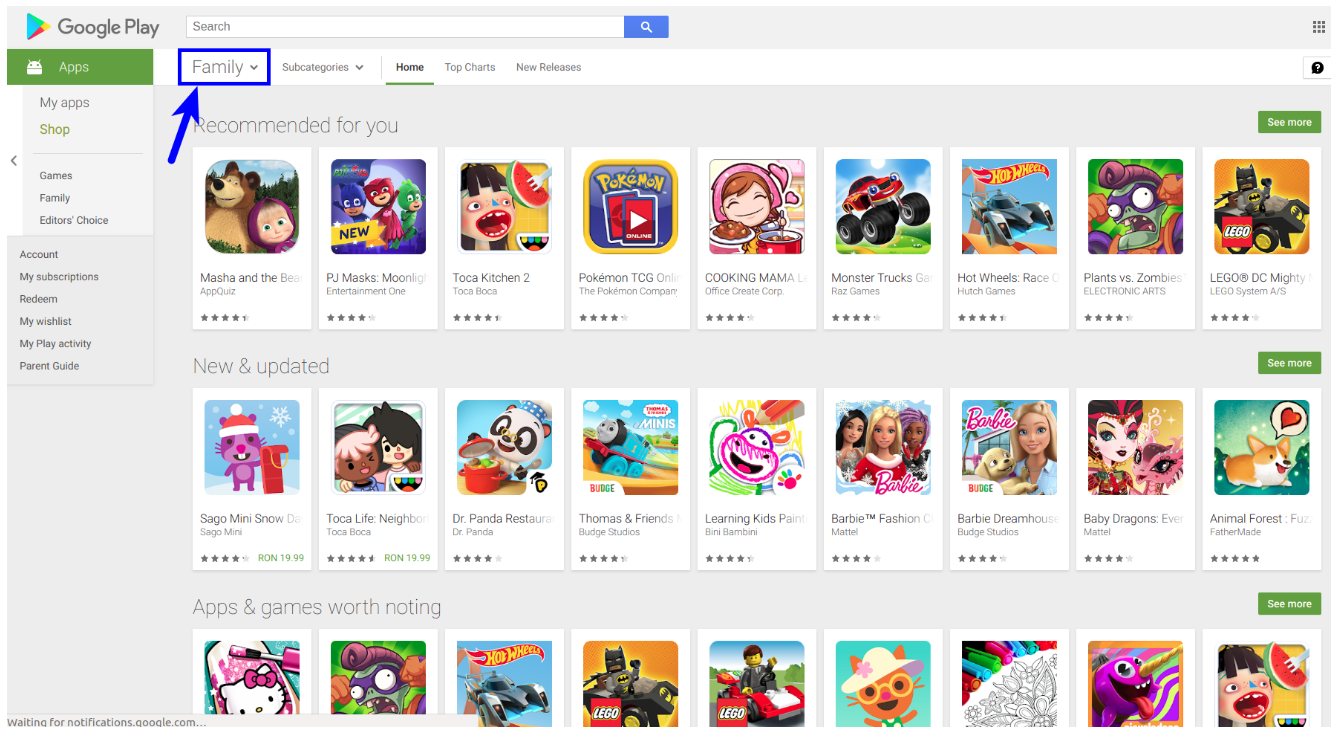

Let's see the frequency table for the Genres column:

In [23]:
display_table(android_free, 9) # Genres

Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115524
Sports : 3.463447653429603
Personalization : 3.3167870036101084
Communication : 3.2378158844765346
Action : 3.1024368231046933
Health & Fitness : 3.0798736462093865
Photography : 2.944494584837545
News & Magazines : 2.7978339350180503
Social : 2.6624548736462095
Travel & Local : 2.3240072202166067
Shopping : 2.2450361010830324
Books & Reference : 2.1435018050541514
Simulation : 2.0419675090252705
Dating : 1.861462093862816
Arcade : 1.8501805054151623
Video Players & Editors : 1.7712093862815883
Casual : 1.7599277978339352
Maps & Navigation : 1.3989169675090252
Food & Drink : 1.2409747292418771
Puzzle : 1.128158844765343
Racing : 0.9927797833935018
Role Playing : 0.9363718411552346
Libraries & Demo : 0.9363718411552346
Auto & Vehicles : 0.9250902527075

- The difference between the `'Genres'` and the `'Category'` columns is not crystal clear, but one thing we can notice is that the `'Genres'` column is much more granular (it has more categories). We're only looking for the bigger picture at the moment, so we'll only work with the `'Category'` column moving forward.

Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. Now we'd like to get an idea about the kind of apps that have most users.

## Most Popular Apps by Genre on App Store

One way to find out what genres are the most popular (have the most users) is to calculate the average number of installations for each app genre. For the Google Play dataset, we can find this information in the `Installs` column, but for the App Store dataset this information is missing. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the `rating_count_tot` column.

Below, we calculate the average number of user ratings per app genre on the App Store:

In [24]:
prime_column = freq_table(ios_free, -5)

for genre in prime_column:
    total = 0
    len_genre = 0
    for row in ios_free:
        genre_app = row[-5]
        if genre_app == genre:
            user_rating = float(row[5])
            total += user_rating
            len_genre += 1
    avg_user_rating = total/len_genre
    print(genre, ':', avg_user_rating)

Social Networking : 71548.34905660378
Photo & Video : 28441.54375
Games : 22788.6696905016
Music : 57326.530303030304
Reference : 74942.11111111111
Health & Fitness : 23298.015384615384
Weather : 52279.892857142855
Utilities : 18684.456790123455
Travel : 28243.8
Shopping : 26919.690476190477
News : 21248.023255813954
Navigation : 86090.33333333333
Lifestyle : 16485.764705882353
Entertainment : 14029.830708661417
Food & Drink : 33333.92307692308
Sports : 23008.898550724636
Book : 39758.5
Finance : 31467.944444444445
Education : 7003.983050847458
Productivity : 21028.410714285714
Business : 7491.117647058823
Catalogs : 4004.0
Medical : 612.0


On average, navigation apps have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together:

In [25]:
for app in ios_free:
    if app[-5] == 'Navigation':
        print(app[1], ':', app[5]) # Print the name and user rating

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


The same pattern applies to social networking apps, where the average number is heavily influenced by a few giants like Facebook, Pinterest, Skype, etc. Same applies to music apps, where a few big players like Pandora, Spotify, and Shazam heavily influence the average number.

Our aim is to find popular genres, but navigation, social networking or music apps might seem more popular than they really are. The average number of ratings seem to be skewed by very few apps which have hundreds of thousands of user ratings, while the other apps may struggle to get past the 10,000 threshold. We could get a better picture by removing these extremely popular apps for each genre and then rework the averages, but we'll leave this level of detail for later.

Reference apps have 74,942 user ratings on average, but it's actually the Bible and Dictionary.com which skew up the average rating:

In [26]:
for app in ios_free:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5]) # Print the name and user rating

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0


- However, this niche seems to show some potential. One thing we could do is take another popular book and turn it into an app where we could add different features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes about the book, etc. On top of that, we could also embed a dictionary within the app, so users don't need to exit our app to look up words in an external app.

This idea seems to fit well with the fact that the App Store is dominated by for-fun apps. This suggests the market might be a bit saturated with for-fun apps, which means a practical app might have more of a chance to stand out among the huge number of apps on the App Store.

Now let's analyze the Google Play market a bit.

## Most Popular Apps by Genre on Google Play

For the Google Play market, we actually have data about the number of installations, so we should be able to get a clearer picture about genre popularity. However, the install numbers don't seem precise enough — we can see that most values are open-ended (100+, 1,000+, 5,000+, etc.):

In [27]:
display_table(android_free, 5) # the Installs columns

1,000,000+ : 15.726534296028879
100,000+ : 11.552346570397113
10,000,000+ : 10.548285198555957
10,000+ : 10.198555956678701
1,000+ : 8.393501805054152
100+ : 6.915613718411552
5,000,000+ : 6.825361010830325
500,000+ : 5.561823104693141
50,000+ : 4.7721119133574
5,000+ : 4.512635379061372
10+ : 3.5424187725631766
500+ : 3.2490974729241873
50,000,000+ : 2.3014440433213
100,000,000+ : 2.1322202166064983
50+ : 1.917870036101083
5+ : 0.78971119133574
1+ : 0.5076714801444043
500,000,000+ : 0.2707581227436823
1,000,000,000+ : 0.22563176895306858
0+ : 0.04512635379061372
0 : 0.01128158844765343


- One problem with this data is that is not precise. For instance, we don't know whether an app with 100,000+ installs has 100,000 installs, 200,000, or 350,000. However, we don't need very precise data for our purposes — we only want to get an idea which app genres attract the most users, and we don't need perfect precision with respect to the number of users.

We're going to leave the numbers as they are, which means that we'll consider that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on.

To perform computations, however, we'll need to convert each install number to float — this means that we need to remove the commas and the plus characters, otherwise the conversion will fail and raise an error. We'll do this directly in the loop below, where we also compute the average number of installations for each genre (category).

In [28]:
category_column = freq_table(android_free, 1)

for category in category_column:
    total = 0
    len_category = 0
    for row in android_free:
        category_app = row[1]
        if category_app == category:
            n_installs = row[5]
            n_installs = n_installs.replace('+', '')
            n_installs = n_installs.replace(',', '')
            total += float(n_installs)
            len_category += 1
    avg_n_installs = total/len_category
    print(category, ':', avg_n_installs)

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8767811.894736841
BUSINESS : 1712290.1474201474
COMICS : 817657.2727272727
COMMUNICATION : 38456119.167247385
DATING : 854028.8303030303
EDUCATION : 1833495.145631068
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1331540.5616438356
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1437816.2687861272
GAME : 15588015.603248259
FAMILY : 3695641.8198090694
MEDICAL : 120550.61980830671
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17840110.40229885
SPORTS : 3638640.1428571427
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10801391.298666667
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5074486.197183099
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_

- On average, communication apps have the most installs: 38,456,119. This number is heavily skewed up by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts), and a few others with over 100 and 500 million installs:

In [29]:
for app in android_free:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])
    

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

- Again, the main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against.

- The game genre seems pretty popular, but previously we found out this part of the market seems a bit saturated, so we'd like to come up with a different app recommendation if possible.

- The books and reference genre looks fairly popular as well, with an average number of installs of 8,767,811. It's interesting to explore this in more depth, since we found this genre has some potential to work well on the App Store, and our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play.

Let's take a look at some of the apps from this genre and their number of installs:

In [30]:
for app in android_free:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

Even though the `'BOOKS_AND_REFERENCE'` contains granular data (books, dictionaries and softwares for reading), but there seems to be some few apps that skewed the average. Let's find out.

In [31]:
for app in android_free:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+


There seems to be a few popular apps in this category, so the market shows potential. 

Let's get some idea about the apps that are in between 1,000,000 and 100,000,000 downloads.

In [32]:
for app in android_free:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+'
                                      or app[5] == '5,000,000+'
                                      or app[5] == '10,000,000+'
                                    or app[5] == '10,000,000+'):
        print(app[0], ':', app[5])

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H

- This niche seems to be dominated by software for processing and reading ebooks, as well as various collections of libraries and dictionaries, so it's probably not a good idea to build similar apps since there'll be some significant competition.

- We also notice there are quite a few apps built around the book **Quran**, which suggests that building an app around a popular book can be profitable. It seems that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the **Google Play** and the **App Store** markets.

- However, it looks like the market is already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.

## Conclusions

In this project, we cleaned and analyzed data about the App Store and Google Play mobile apps and made the following recommendations for app profile that could be profitable for both markets.

- Turning a popular book (perhaps a more recent book) into an app could be profitable for both the Google Play and the App Store markets. 
- The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.